In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from sklearn.svm import SVC

In [4]:
data = sio.loadmat('C:\\Users\\Administrator\\Desktop\\data2.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:54 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0.107143 , 0.60307  ],
        [0.093318 , 0.649854 ],
        [0.0979263, 0.705409 ],
        ...,
        [0.975806 , 0.439474 ],
        [0.989631 , 0.425439 ],
        [0.996544 , 0.414912 ]]),
 'y': array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
       

In [5]:
x,y = data['X'],data['y']
x.shape,y.shape

((863, 2), (863, 1))

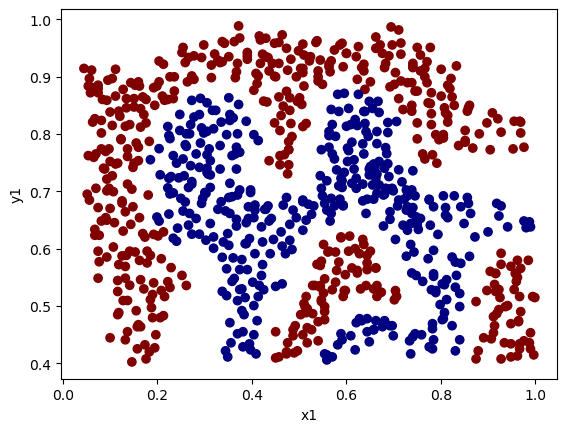

In [9]:
def plot_data(x,y):
    plt.scatter(x[:,0],x[:,1],c=y.flatten(),cmap='jet')
    plt.xlabel('x1')
    plt.ylabel('y1')
plot_data(x,y)

In [11]:
svc1 = SVC(C=1,kernel='rbf',gamma=50)
svc1.fit(x,y.flatten())
svc1.predict(x)
svc1.score(x,y.flatten())

0.9895712630359212

In [13]:
def plot_boundary(model):
    x_min,x_max = 0,1
    y_min,y_max = 0.4,1
    xx,yy = np.meshgrid(np.linspace(x_min,x_max,500),np.linspace(y_min,y_max,500))
    # np.c_,np.r_ 将两个矩阵按列（左右），按行（上下）拼接
    z = model.predict(np.c_[xx.flatten(),yy.flatten()])
    zz = z.reshape(xx.shape)
    plt.contour(xx,yy,zz)

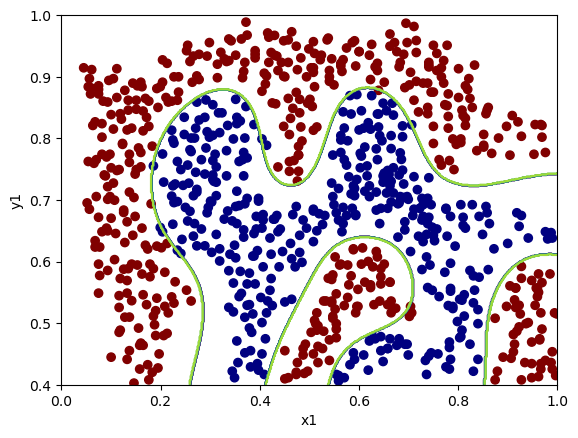

In [15]:
plot_boundary(svc1)
plot_data(x,y)

In [16]:
#寻找最优参数

In [23]:
Cvalues = [3,10,30,100,0.01,0.03,0.1,0.3,1]
Gammas = [1,3,10,30,100,0.01,0.03,0.1,0.3]

In [25]:
best_C = 0
best_Gammas = 0
best_score = 0
for c in Cvalues:
    for G in Gammas:
        svc = SVC(C=c,kernel='rbf',gamma=G)
        svc.fit(x,y.flatten())
        svc.predict(x)
        score = svc.score(x,y.flatten())
        if score > best_score:
            best_score = score
            best_C = c
            best_Gammas = G

print(best_score,best_C,best_Gammas)

0.9988412514484357 100 100
